# QQ Plots

In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


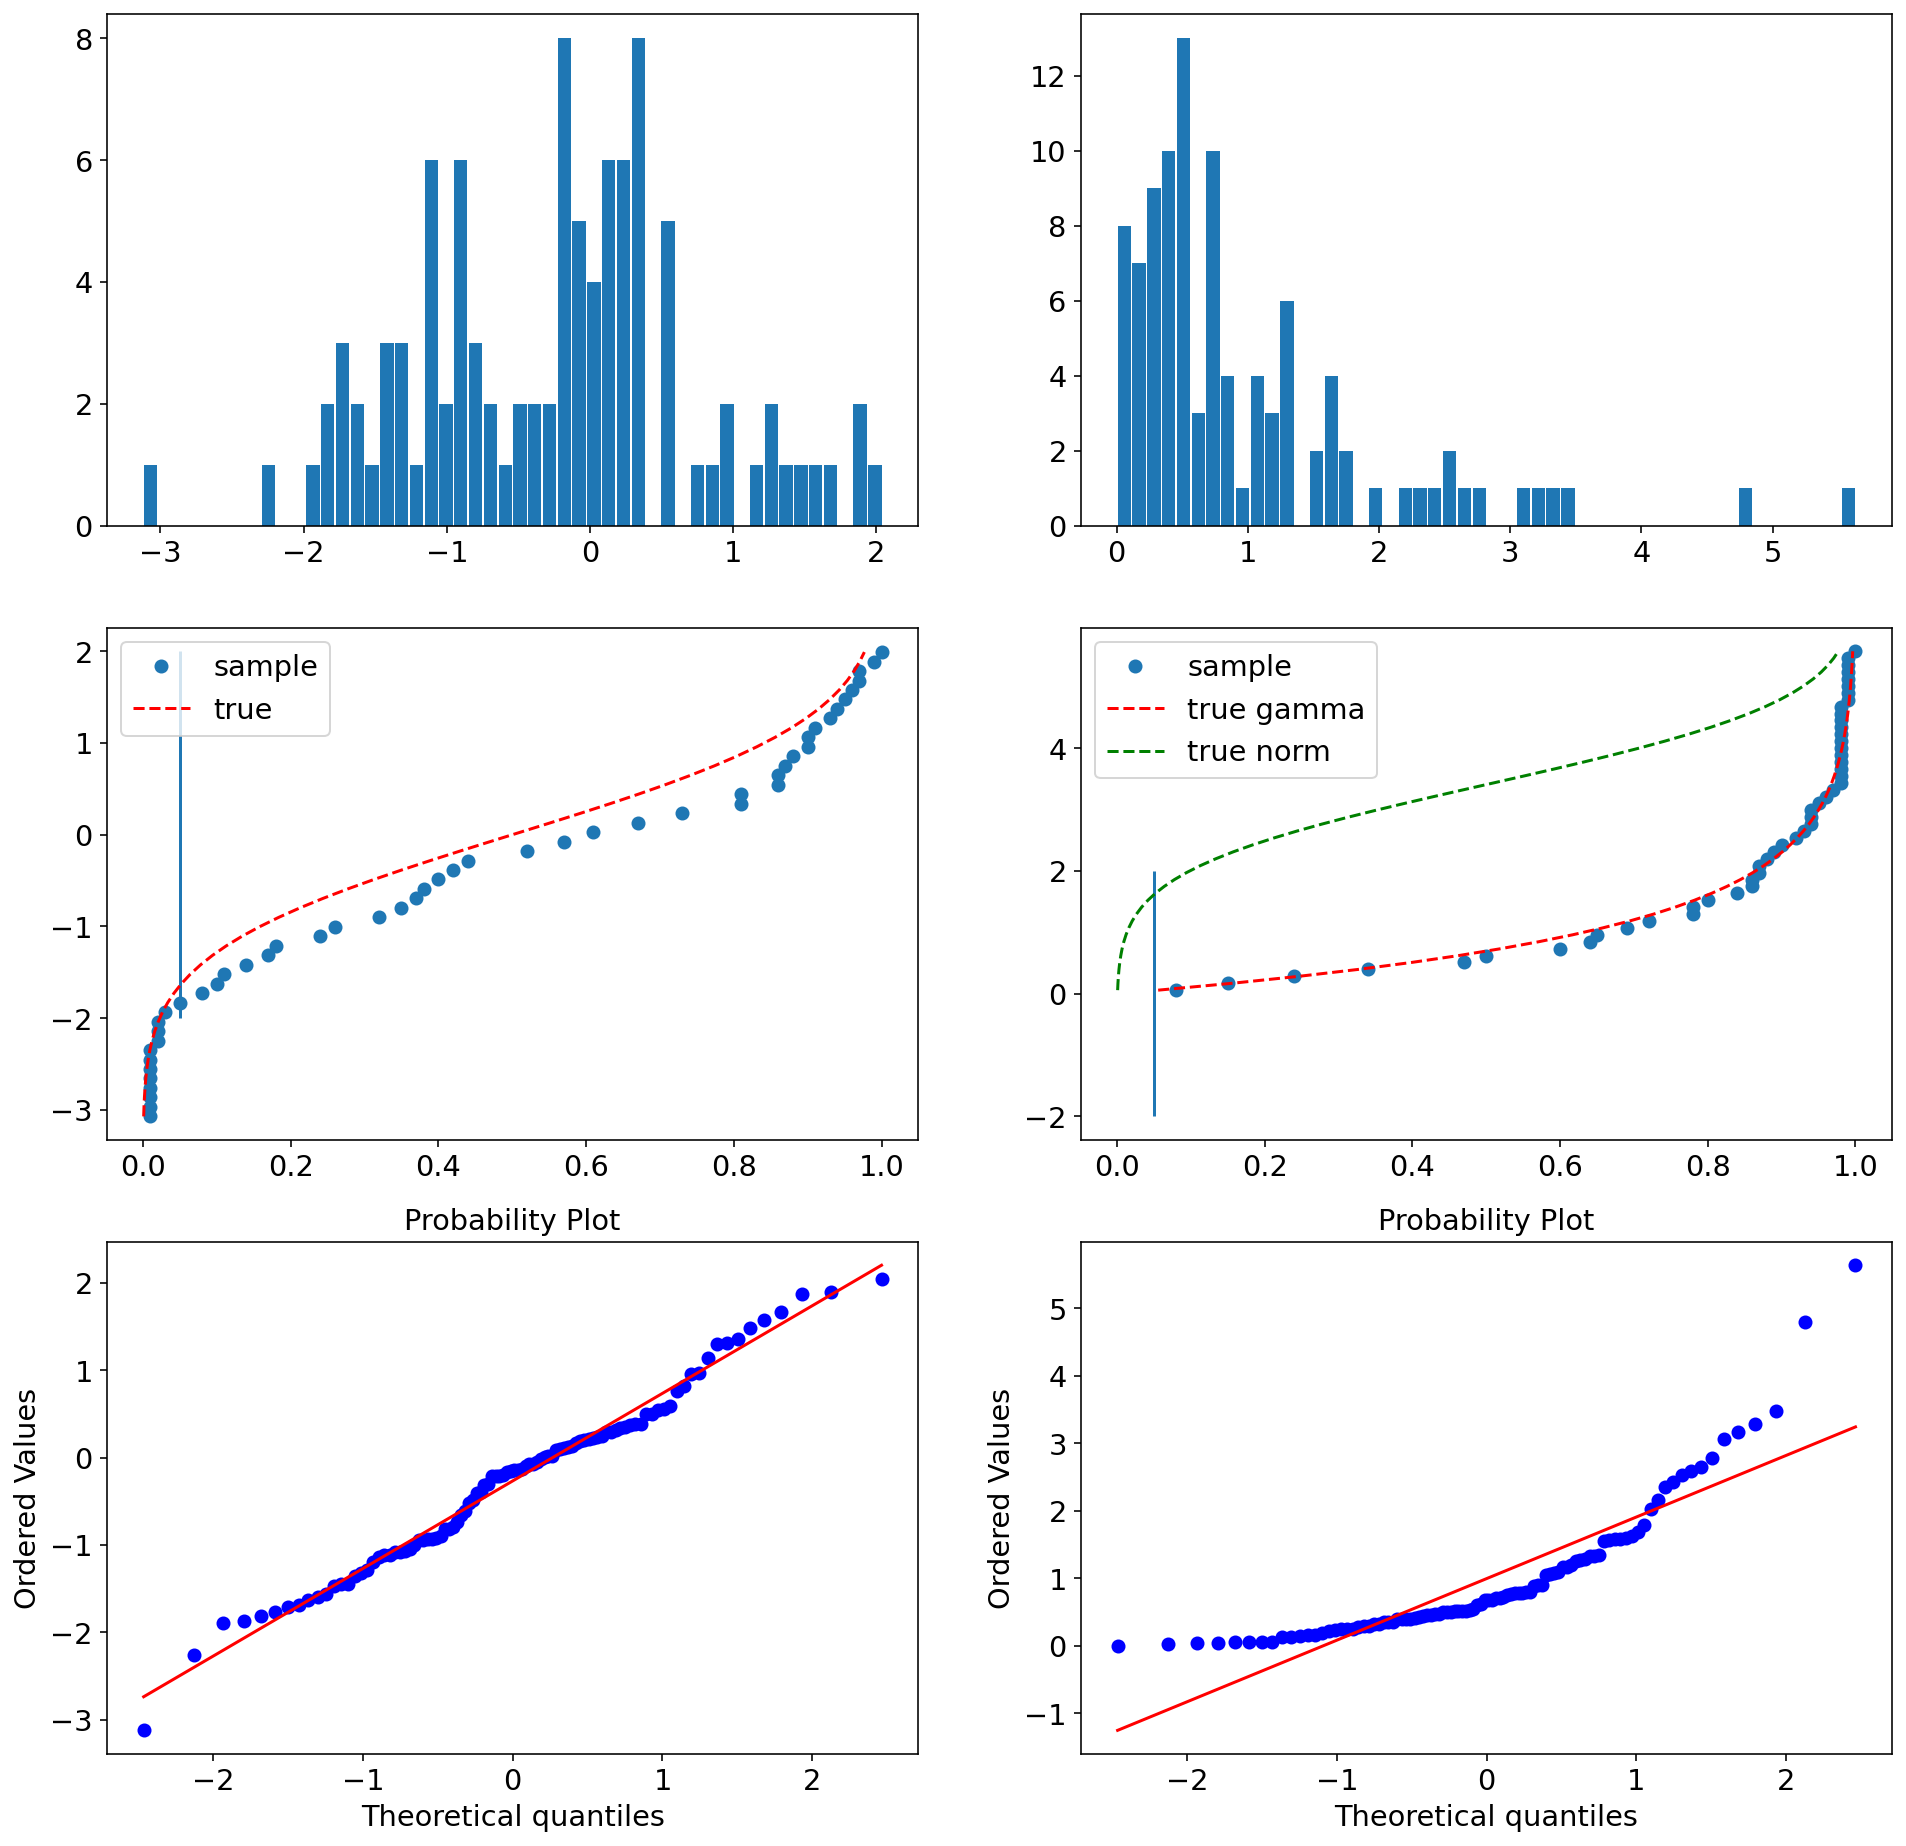

In [21]:
### 
fig,ax=plt.subplots(3,2,figsize=[16,16])

Ndraws=100
Nbins=50

X_norm=stats.norm.rvs(loc=0,scale=1,size=Ndraws)


# histogram
out_norm=ax[0,0].hist(X_norm,Nbins,rwidth=0.9)
hist_norm=out_norm[0]
bin_edges_norm=out_norm[1]
bin_centers_norm=(bin_edges_norm[1:]+bin_edges_norm[0:-1])/2

# approximate cdf from histogram
cdf_norm_hist=np.cumsum(hist_norm)*np.mean(np.diff(bin_edges_norm))
cdf_norm_hist=cdf_norm_hist/np.max(cdf_norm_hist)

# true cdf
cdf_norm_true=stats.norm.cdf(bin_centers_norm,loc=0,scale=1)


ax[1,0].plot(cdf_norm_hist,bin_centers_norm,'o',label='sample')
ax[1,0].plot(cdf_norm_true,bin_centers_norm,'r--',label='true')
ax[1,0].legend()
ax[1,0].vlines(0.05,ymin=-2,ymax=2)

#out_gamma=ax[0,1].hist(X_gamma,Nbins,rwidth=0.9)

X_gamma=stats.gamma.rvs(a=1,loc=0,scale=1,size=Ndraws)
out_gamma=ax[0,1].hist(X_gamma,Nbins,rwidth=0.9)
hist_gamma=out_gamma[0]
bin_edges_gamma=out_gamma[1]
bin_centers_gamma=(bin_edges_gamma[1:]+bin_edges_gamma[0:-1])/2

#approx CDF
cdf_gamma_hist=np.cumsum(hist_gamma)*np.mean(np.diff(bin_edges_gamma))
cdf_gamma_hist=cdf_gamma_hist/np.max(cdf_gamma_hist)

#true cdf
cdf_gamma_true=stats.gamma.cdf(bin_centers_gamma,a=1,loc=0,scale=1)

ax[1,1].plot(cdf_gamma_hist,bin_centers_gamma,'o',label='sample')
ax[1,1].plot(cdf_gamma_true,bin_centers_gamma,'r--',label='true gamma')
ax[1,1].plot(cdf_norm_true,bin_centers_gamma,'g--',label='true norm')
ax[1,1].legend()
ax[1,1].vlines(0.05,ymin=-2,ymax=2)

stats.probplot(X_norm,plot=ax[2,0]);
stats.probplot(X_gamma,plot=ax[2,1]);